In [1]:
!pip install tensorflow numpy matplotlib scikit-learn

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, classification_report

In [3]:
# Load and prepare the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize and reshape the data
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# Add random noise to the images
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [46]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D

input_img = Input(shape=(28, 28, 1))

# Encoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

# Output Layer
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Autoencoder model
autoencoder = Model(input_img, decoded)

In [47]:
optimizer = Adam(learning_rate=1e-5)
autoencoder.compile(optimizer=optimizer, loss='binary_crossentropy')

In [48]:
# Model summary
autoencoder.summary()

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)          │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_101 (Conv2D)                  │ (None, 28, 28, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_42 (MaxPooling2D)      │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_102 (Conv2D)                  │ (None, 14, 14, 8)           │           1,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_43 (MaxPooling2D)      │ (None, 7, 7, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_103 (Conv2D)                  │ (None, 7, 7, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_39 (UpSampling2D)      │ (None, 14, 14, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_104 (Conv2D)                  │ (None, 14, 14, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_40 (UpSampling2D)      │ (None, 28, 28, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_105 (Conv2D)                  │ (None, 28, 28, 1)           │             145 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,217 (12.57 KB)

 Trainable params: 3,217 (12.57 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
# Train the model
autoencoder.fit(x_train_noisy, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))


Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 0.7108 - val_loss: 0.6851
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6727 - val_loss: 0.6090
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5681 - val_loss: 0.4982
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4886 - val_loss: 0.4727
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.4612 - val_loss: 0.4379
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.4246 - val_loss: 0.3931
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.3772 - val_loss: 0.3409
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3265 - val_loss: 0.2930
Epoch 9/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2817 - val_loss: 0.2559
Epoch 10/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2482 - val_loss: 0.2300
Epoch 11/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2251 - val_loss: 0.2125
Epoch 12/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/st

In [50]:
decoded_imgs = autoencoder.predict(x_test_noisy)

# Calculate Mean Squared Error (MSE) for accuracy
mse = mean_squared_error(x_test.reshape(-1), decoded_imgs.reshape(-1))
print(f"Mean Squared Error: {mse}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Mean Squared Error: 0.022801313549280167


In [51]:
threshold = np.percentile(decoded_imgs, 95)
binary_original = (x_test > threshold).astype(int).reshape(-1)
binary_reconstructed = (decoded_imgs > threshold).astype(int).reshape(-1)
report = classification_report(binary_original, binary_reconstructed, target_names=["Background", "Foreground"])
print(report)


              precision    recall  f1-score   support

  Background       0.94      0.99      0.97   7066346
  Foreground       0.85      0.43      0.57    773654

    accuracy                           0.94   7840000
   macro avg       0.90      0.71      0.77   7840000
weighted avg       0.93      0.94      0.93   7840000



In [52]:
# Calculate additional metrics based on the binary predictions
TP = np.sum((binary_original == 1) & (binary_reconstructed == 1))
TN = np.sum((binary_original == 0) & (binary_reconstructed == 0))
FP = np.sum((binary_original == 0) & (binary_reconstructed == 1))
FN = np.sum((binary_original == 1) & (binary_reconstructed == 0))
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

# Print additional metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1_score:.4f}")

Accuracy: 0.9365
Precision: 0.8523
Recall: 0.4318
F1 Score: 0.5732


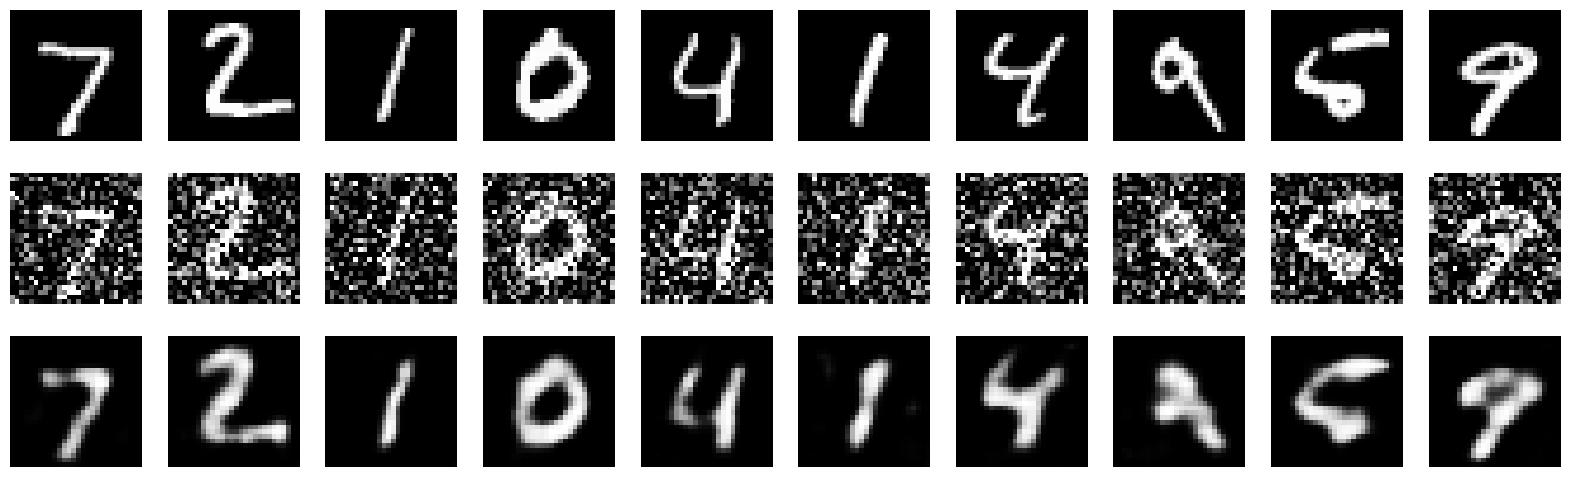

In [53]:
n = 10  # Number of images to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    # Display noisy
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    # Display reconstructed
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()